#### (11.29~)

## pandas backend를 이용한 플랏

### import

In [176]:
import numpy as np
import pandas as pd
import warnings

In [177]:
#!pip install pandas_datareader
from pandas_datareader import data as pdr

### line

#### 예제1(matplotlib)

In [178]:
symbols = ['AMZN','AAPL','GOOG','MSFT','NFLX','NVDA','TSLA'] #아마존,애플,구글,마이크로소프트,넷플릭스,엔비디아,테슬라
start = '2020-01-01'
end = '2020-11-28'
df = pdr.get_data_yahoo(symbols,start,end)['Adj Close']

In [179]:
df

Symbols,AMZN,AAPL,GOOG,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,
2019-12-31,1847.839966,72.337990,1337.020020,154.749725,323.570007,58.676846,83.666000
2020-01-02,1898.010010,73.988472,1367.369995,157.615097,329.809998,59.826439,86.052002
2020-01-03,1874.969971,73.269150,1360.660034,155.652527,325.899994,58.868862,88.601997
2020-01-06,1902.880005,73.852989,1394.209961,156.054855,335.829987,59.115734,90.307999
2020-01-07,1906.859985,73.505646,1393.339966,154.632004,330.750000,59.831425,93.811996
...,...,...,...,...,...,...,...
2020-11-20,3099.399902,116.621048,1742.189941,208.641098,488.239990,130.724670,489.609985
2020-11-23,3098.389893,113.152435,1734.859985,208.363419,476.619995,131.246552,521.849976
2020-11-24,3118.060059,114.464348,1768.880005,212.082260,482.880005,129.426178,555.380005


In [180]:
df.reset_index() #pandas backend 사용해 plot 그릴 때 이처럼 tidy data(long form)이 아닌 wide form을 활용한다.

Symbols,Date,AMZN,AAPL,GOOG,MSFT,NFLX,NVDA,TSLA
0,2019-12-31,1847.839966,72.337990,1337.020020,154.749725,323.570007,58.676846,83.666000
1,2020-01-02,1898.010010,73.988472,1367.369995,157.615097,329.809998,59.826439,86.052002
2,2020-01-03,1874.969971,73.269150,1360.660034,155.652527,325.899994,58.868862,88.601997
3,2020-01-06,1902.880005,73.852989,1394.209961,156.054855,335.829987,59.115734,90.307999
4,2020-01-07,1906.859985,73.505646,1393.339966,154.632004,330.750000,59.831425,93.811996
...,...,...,...,...,...,...,...,...
226,2020-11-20,3099.399902,116.621048,1742.189941,208.641098,488.239990,130.724670,489.609985
227,2020-11-23,3098.389893,113.152435,1734.859985,208.363419,476.619995,131.246552,521.849976
228,2020-11-24,3118.060059,114.464348,1768.880005,212.082260,482.880005,129.426178,555.380005
229,2020-11-25,3185.070068,115.319077,1771.430054,212.092163,485.000000,132.192978,574.000000


`-` 1개의 y를 그리기

<AxesSubplot:xlabel='Date'>

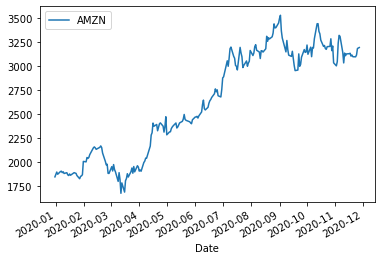

In [181]:
df.reset_index().plot.line(x='Date',y='AMZN')

`-` 2개의 y를 겹쳐 그리기

<AxesSubplot:xlabel='Date'>

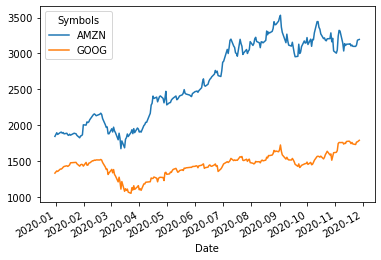

In [182]:
df.reset_index().plot.line(x='Date',y=['AMZN','GOOG'])

In [183]:
df.reset_index().melt(id_vars='Date') #tidy data

,Date,Symbols,value
0,2019-12-31,AMZN,1847.839966
1,2020-01-02,AMZN,1898.010010
2,2020-01-03,AMZN,1874.969971
3,2020-01-06,AMZN,1902.880005
4,2020-01-07,AMZN,1906.859985
...,...,...,...
1612,2020-11-20,TSLA,489.609985
1613,2020-11-23,TSLA,521.849976
1614,2020-11-24,TSLA,555.380005
1615,2020-11-25,TSLA,574.000000


In [184]:
df.stack().reset_index() #tidy data

,Date,Symbols,0
0,2019-12-31,AMZN,1847.839966
1,2019-12-31,AAPL,72.337990
2,2019-12-31,GOOG,1337.020020
3,2019-12-31,MSFT,154.749725
4,2019-12-31,NFLX,323.570007
...,...,...,...
1612,2020-11-27,GOOG,1793.189941
1613,2020-11-27,MSFT,213.440857
1614,2020-11-27,NFLX,491.359985
1615,2020-11-27,NVDA,132.457657


`-` 모든 y 겹쳐 그리기

<AxesSubplot:xlabel='Date'>

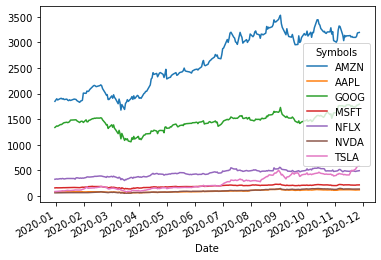

In [185]:
df.reset_index().plot.line(x='Date')

`-` 그림크기 조정

<AxesSubplot:xlabel='Date'>

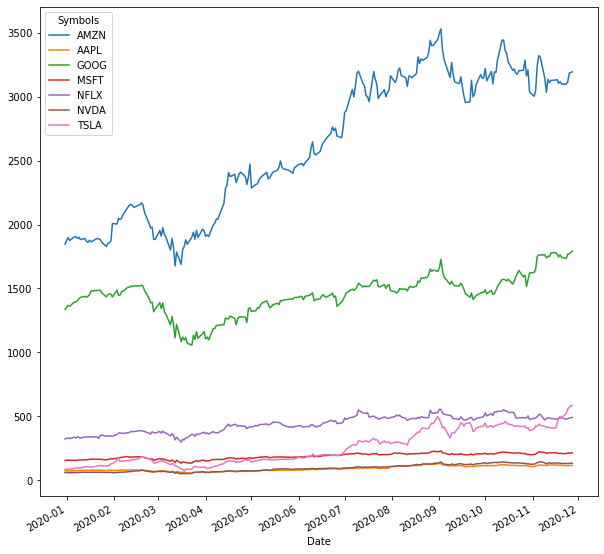

In [186]:
df.reset_index().plot.line(x='Date',figsize=(10,10))

`-` 서브플랏

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

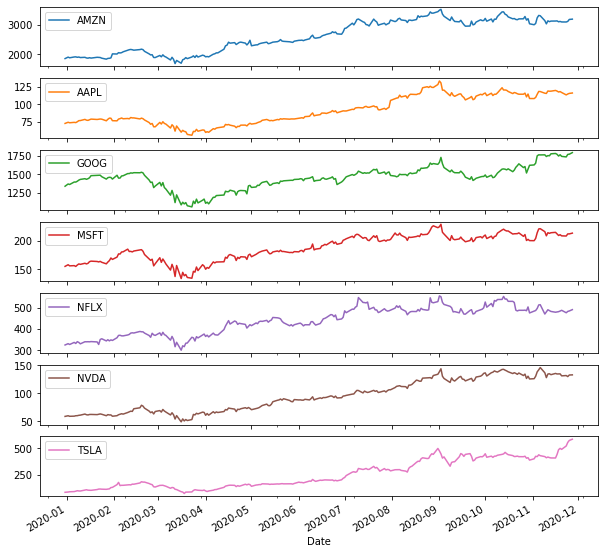

In [187]:
df.reset_index().plot.line(x='Date',figsize=(10,10),subplots=True)

`-` 레이아웃 조정

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

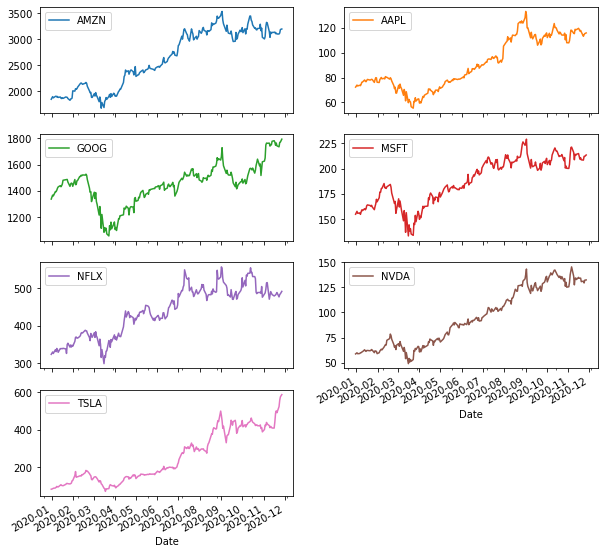

In [188]:
df.reset_index().plot.line(x='Date',figsize=(10,10),subplots=True,layout=(4,2))

`-` 폰트 조정

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

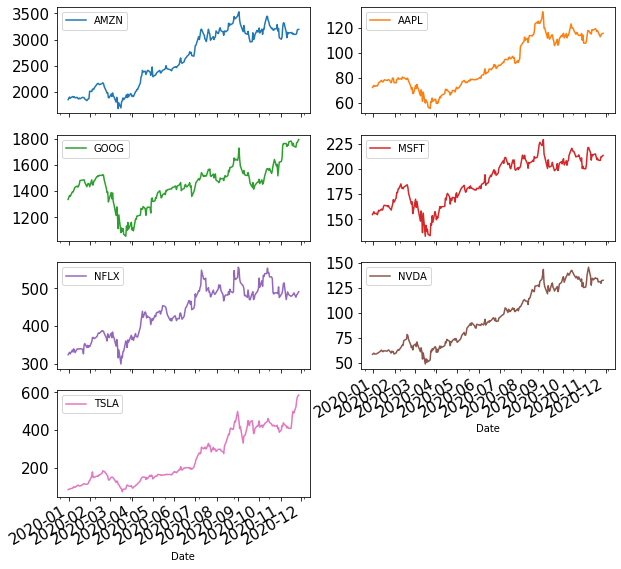

In [189]:
df.reset_index().plot.line(x='Date',figsize=(10,10),subplots=True,layout=(4,2),fontsize=15)

`-` 투명도 조정

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

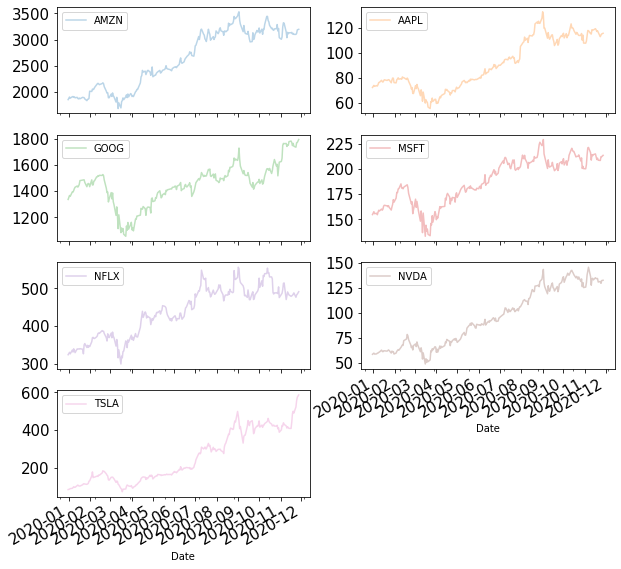

In [190]:
df.reset_index().plot.line(x='Date',figsize=(10,10),subplots=True,layout=(4,2),fontsize=15,alpha=0.3)

`-` 레전드 삭제

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

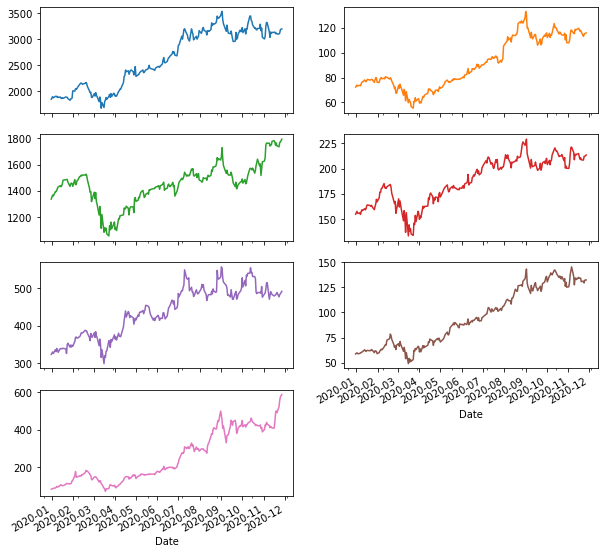

In [191]:
df.reset_index().plot.line(x='Date',figsize=(10,10),subplots=True,layout=(4,2),legend=False)

### bar,barh

#### 예제1(matplotlib)

In [250]:
df = pd.read_csv('https://raw.githubusercontent.com/kalilurrahman/datasets/main/mobilephonemktshare2020.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,31.49,22.09,10.02,7.79,4.10,3.15,2.41,2.40,9.51,0.54,2.35,0.95,0.96,0.70,0.84,0.74
1,2019-11,31.36,22.90,10.18,8.16,4.42,3.41,2.40,2.40,9.10,0.78,0.66,0.97,0.97,0.73,0.83,0.75
2,2019-12,31.37,24.79,9.95,7.73,4.23,3.19,2.50,2.54,8.13,0.84,0.75,0.90,0.87,0.74,0.77,0.70
3,2020-01,31.29,24.76,10.61,8.10,4.25,3.02,2.42,2.40,7.55,0.88,0.69,0.88,0.86,0.79,0.80,0.69
4,2020-02,30.91,25.89,10.98,7.80,4.31,2.89,2.36,2.34,7.06,0.89,0.70,0.81,0.77,0.78,0.80,0.69
5,2020-03,30.80,27.03,10.70,7.70,4.30,2.87,2.35,2.28,6.63,0.93,0.73,0.72,0.74,0.78,0.76,0.66
6,2020-04,30.41,28.79,10.28,7.60,4.20,2.75,2.51,2.28,5.84,0.90,0.75,0.69,0.71,0.80,0.76,0.70
7,2020-05,30.18,26.72,10.39,8.36,4.70,3.12,2.46,2.19,6.31,1.04,0.70,0.73,0.77,0.81,0.78,0.76
8,2020-06,31.06,25.26,10.69,8.55,4.65,3.18,2.57,2.11,6.39,1.04,0.68,0.74,0.75,0.77,0.78,0.75
9,2020-07,30.95,24.82,10.75,8.94,4.69,3.46,2.45,2.03,6.41,1.13,0.65,0.76,0.74,0.76,0.75,0.72


<AxesSubplot:xlabel='Date'>

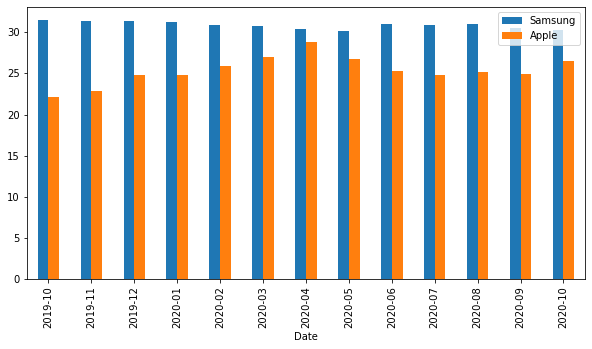

In [251]:
df.plot.bar(x='Date',y=['Samsung','Apple'],figsize=(10,5))

<AxesSubplot:xlabel='Date'>

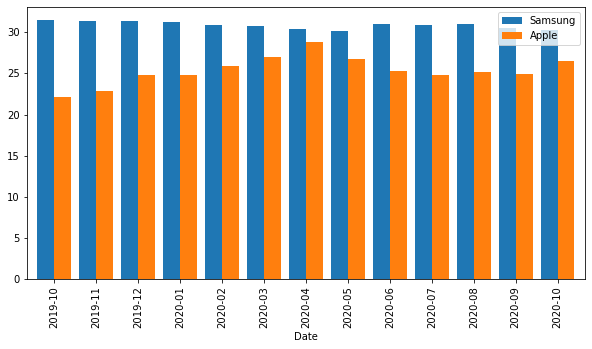

In [252]:
df.plot.bar(x='Date',y=['Samsung','Apple'],figsize=(10,5),width=0.8)

<AxesSubplot:ylabel='Date'>

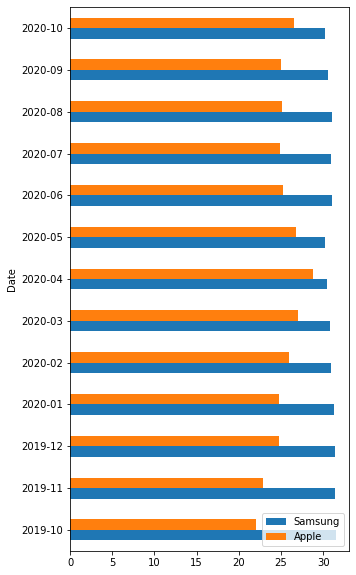

In [253]:
df.plot.barh(x='Date',y=['Samsung','Apple'],figsize=(5,10))

In [254]:
#df.plot.bar(x='Date',figsize=(20,10))
#df.plot.barh(x='Date',figsize=(5,50))

- 그림이 별로다

array([[<AxesSubplot:title={'center':'Samsung'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'Apple'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'Huawei'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'Xiaomi'}, xlabel='Date'>],
       [<AxesSubplot:title={'center':'Oppo'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'Mobicel'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'Motorola'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'LG'}, xlabel='Date'>],
       [<AxesSubplot:title={'center':'Others'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'Realme'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'Google'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'Nokia'}, xlabel='Date'>],
       [<AxesSubplot:title={'center':'Lenovo'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'OnePlus'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'Sony'}, xlabel='Date'>,
        <AxesSubplot:title={'center':'Asus

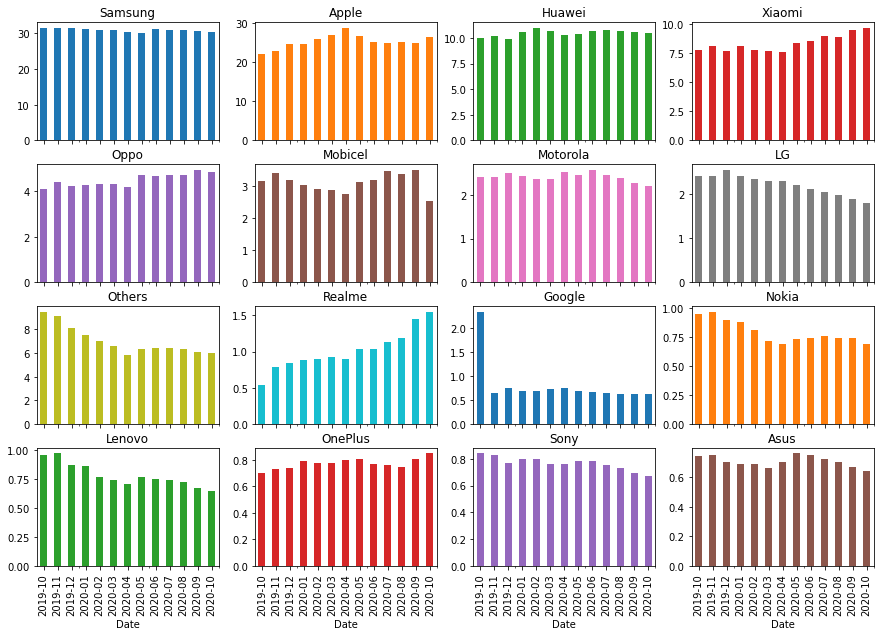

In [255]:
df.plot.bar(x='Date',figsize=(15,10),subplots=True,layout=(4,4),legend=False)

- 이건 사실 라인플랏으로 그려도 괜찮음(시간순서이므로)

`-` 비율을 평균내는 것은 이상하지만 시각화 예제를 위해서제조사별 평균점유율을 시각화하여보자.

In [257]:
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,31.49,22.09,10.02,7.79,4.10,3.15,2.41,2.40,9.51,0.54,2.35,0.95,0.96,0.70,0.84,0.74
1,2019-11,31.36,22.90,10.18,8.16,4.42,3.41,2.40,2.40,9.10,0.78,0.66,0.97,0.97,0.73,0.83,0.75
2,2019-12,31.37,24.79,9.95,7.73,4.23,3.19,2.50,2.54,8.13,0.84,0.75,0.90,0.87,0.74,0.77,0.70
3,2020-01,31.29,24.76,10.61,8.10,4.25,3.02,2.42,2.40,7.55,0.88,0.69,0.88,0.86,0.79,0.80,0.69
4,2020-02,30.91,25.89,10.98,7.80,4.31,2.89,2.36,2.34,7.06,0.89,0.70,0.81,0.77,0.78,0.80,0.69
5,2020-03,30.80,27.03,10.70,7.70,4.30,2.87,2.35,2.28,6.63,0.93,0.73,0.72,0.74,0.78,0.76,0.66
6,2020-04,30.41,28.79,10.28,7.60,4.20,2.75,2.51,2.28,5.84,0.90,0.75,0.69,0.71,0.80,0.76,0.70
7,2020-05,30.18,26.72,10.39,8.36,4.70,3.12,2.46,2.19,6.31,1.04,0.70,0.73,0.77,0.81,0.78,0.76
8,2020-06,31.06,25.26,10.69,8.55,4.65,3.18,2.57,2.11,6.39,1.04,0.68,0.74,0.75,0.77,0.78,0.75
9,2020-07,30.95,24.82,10.75,8.94,4.69,3.46,2.45,2.03,6.41,1.13,0.65,0.76,0.74,0.76,0.75,0.72


In [262]:
df.melt(id_vars='Date').groupby('variable').agg(np.mean)

,value
variable,
Apple,25.362308
Asus,0.705385
Google,0.811538
Huawei,10.484615
LG,2.200000
Lenovo,0.783077
Mobicel,3.112308
Motorola,2.407692
Nokia,0.793846


<AxesSubplot:xlabel='variable'>

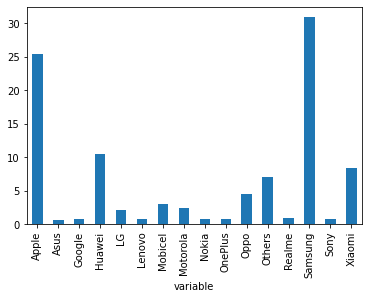

In [198]:
df.melt(id_vars='Date').groupby('variable').agg(np.mean).plot.bar(legend=False)

`-` 소팅(정렬)을 한 뒤에 시각화해보자.

<AxesSubplot:xlabel='variable'>

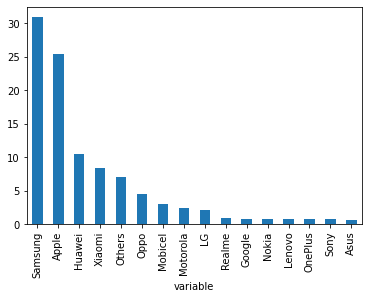

In [199]:
df.melt(id_vars='Date').groupby('variable').agg(np.mean).sort_values('value',ascending=False).plot.bar(legend=False)

#### 예제1 (plotly)

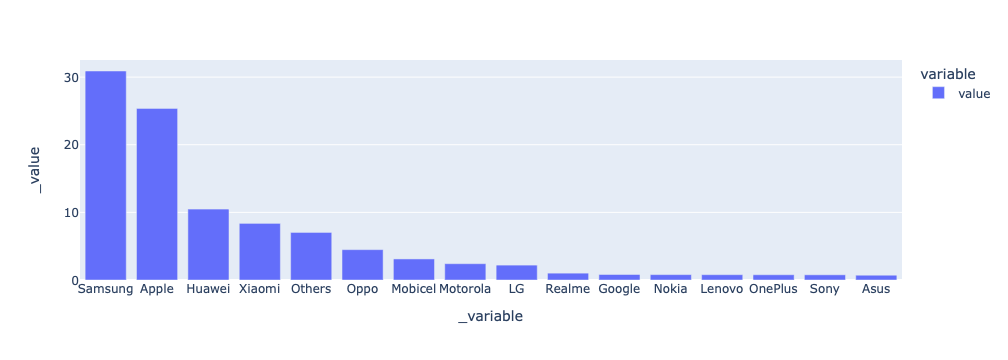

In [200]:
df.melt(id_vars='Date').groupby('variable').agg(np.mean).sort_values('value',ascending=False).\
plot.bar(backend='plotly')

In [263]:
df.melt(id_vars='Date')

,Date,variable,value
0,2019-10,Samsung,31.49
1,2019-11,Samsung,31.36
2,2019-12,Samsung,31.37
3,2020-01,Samsung,31.29
4,2020-02,Samsung,30.91
...,...,...,...
203,2020-06,Asus,0.75
204,2020-07,Asus,0.72
205,2020-08,Asus,0.70
206,2020-09,Asus,0.67


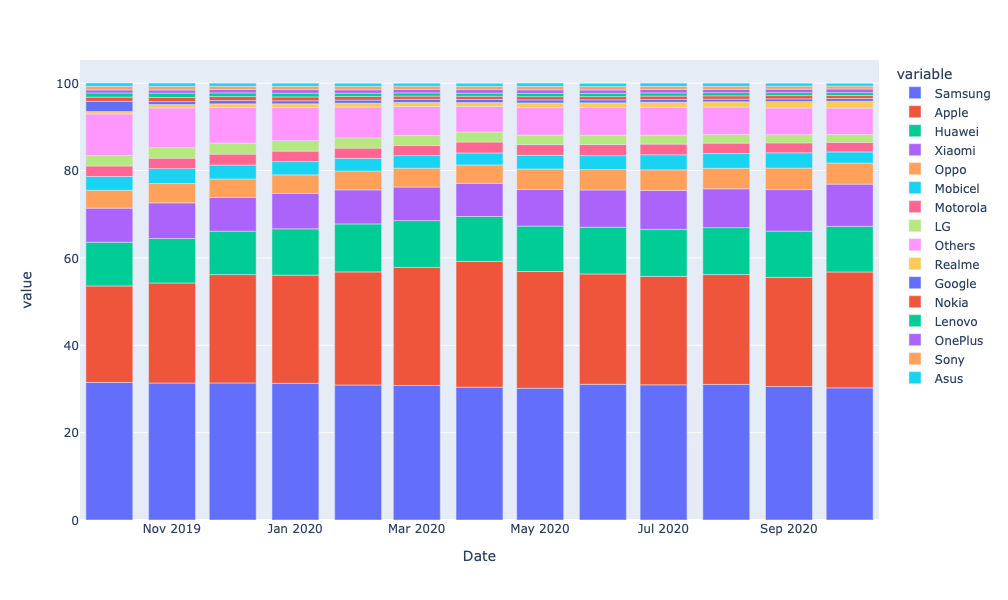

In [201]:
df.melt(id_vars='Date').\
plot.bar(x='Date',y='value',color='variable',backend='plotly',width=700,height=600)

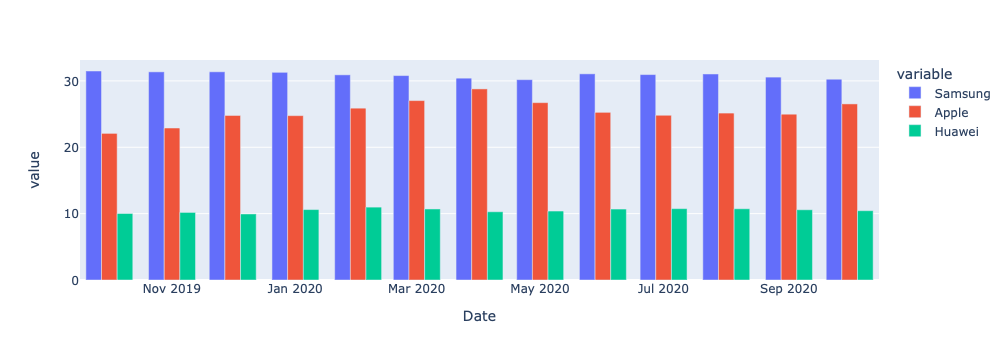

In [202]:
df.melt(id_vars='Date').query("variable=='Samsung' or variable=='Apple' or variable=='Huawei'").\
plot.bar(x='Date',y='value',color='variable',backend='plotly',barmode='group')

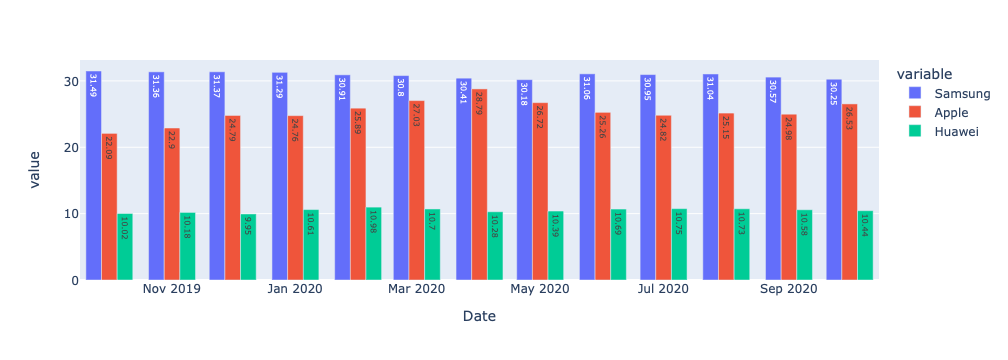

In [203]:
df.melt(id_vars='Date').query("variable=='Samsung' or variable=='Apple' or variable=='Huawei'").\
plot.bar(x='Date',y='value',color='variable',backend='plotly',barmode='group',text='value')

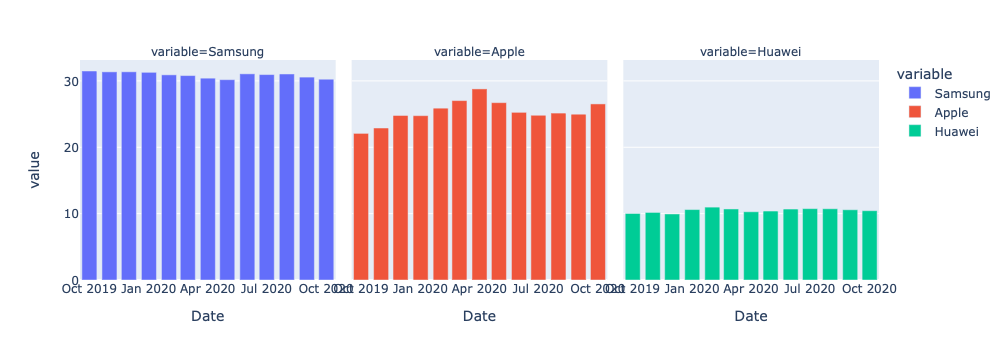

In [204]:
df.melt(id_vars='Date').query("variable=='Samsung' or variable=='Apple' or variable=='Huawei'").\
plot.bar(x='Date',y='value',color='variable',backend='plotly',facet_col='variable')

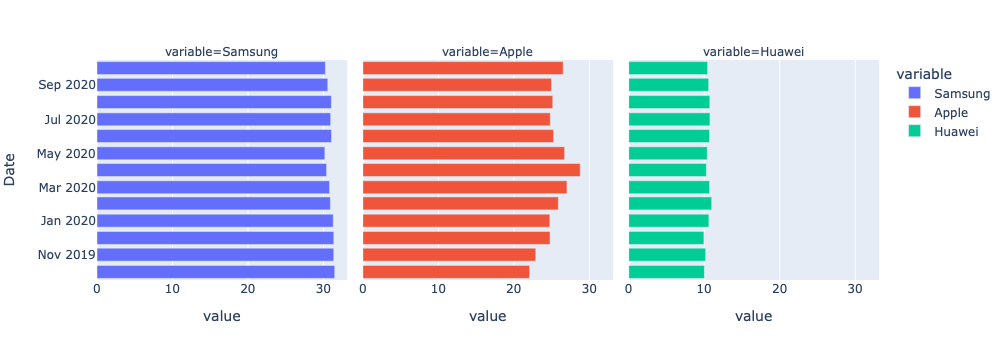

In [205]:
df.melt(id_vars='Date').query("variable=='Samsung' or variable=='Apple' or variable=='Huawei'").\
plot.bar(y='Date',x='value',color='variable',backend='plotly',facet_col='variable')

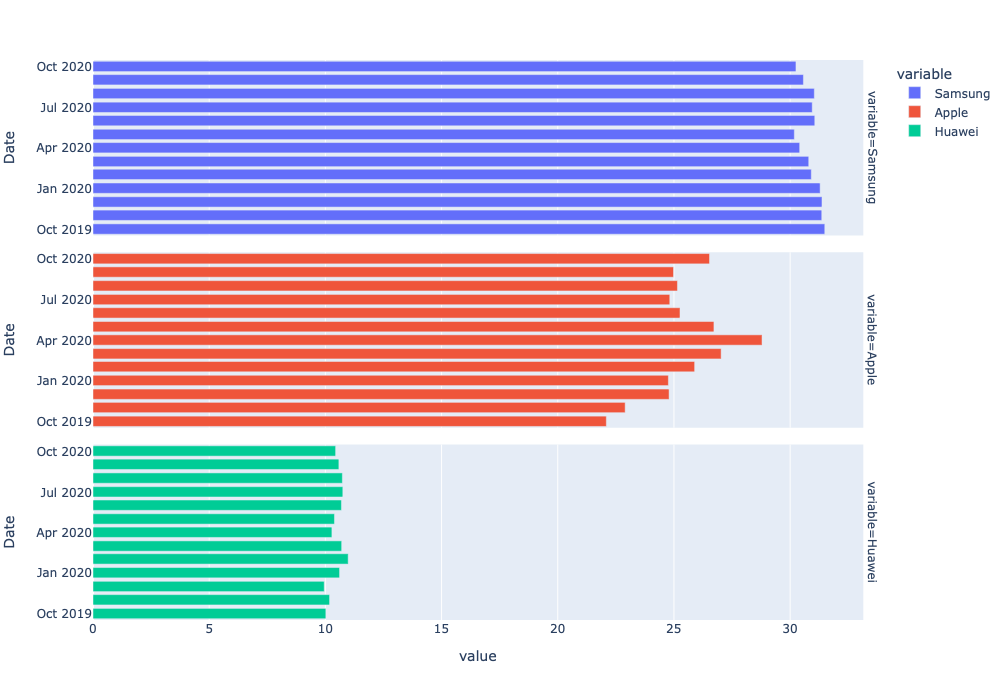

In [206]:
df.melt(id_vars='Date').query("variable=='Samsung' or variable=='Apple' or variable=='Huawei'").\
plot.bar(y='Date',x='value',color='variable',backend='plotly',facet_row='variable',height=700)

#### 12.1~

In [207]:
df = pd.read_csv('https://raw.githubusercontent.com/kalilurrahman/datasets/main/mobilephonemktshare2020.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,31.49,22.09,10.02,7.79,4.10,3.15,2.41,2.40,9.51,0.54,2.35,0.95,0.96,0.70,0.84,0.74
1,2019-11,31.36,22.90,10.18,8.16,4.42,3.41,2.40,2.40,9.10,0.78,0.66,0.97,0.97,0.73,0.83,0.75
2,2019-12,31.37,24.79,9.95,7.73,4.23,3.19,2.50,2.54,8.13,0.84,0.75,0.90,0.87,0.74,0.77,0.70
3,2020-01,31.29,24.76,10.61,8.10,4.25,3.02,2.42,2.40,7.55,0.88,0.69,0.88,0.86,0.79,0.80,0.69
4,2020-02,30.91,25.89,10.98,7.80,4.31,2.89,2.36,2.34,7.06,0.89,0.70,0.81,0.77,0.78,0.80,0.69
5,2020-03,30.80,27.03,10.70,7.70,4.30,2.87,2.35,2.28,6.63,0.93,0.73,0.72,0.74,0.78,0.76,0.66
6,2020-04,30.41,28.79,10.28,7.60,4.20,2.75,2.51,2.28,5.84,0.90,0.75,0.69,0.71,0.80,0.76,0.70
7,2020-05,30.18,26.72,10.39,8.36,4.70,3.12,2.46,2.19,6.31,1.04,0.70,0.73,0.77,0.81,0.78,0.76
8,2020-06,31.06,25.26,10.69,8.55,4.65,3.18,2.57,2.11,6.39,1.04,0.68,0.74,0.75,0.77,0.78,0.75
9,2020-07,30.95,24.82,10.75,8.94,4.69,3.46,2.45,2.03,6.41,1.13,0.65,0.76,0.74,0.76,0.75,0.72


<AxesSubplot:ylabel='Apple'>

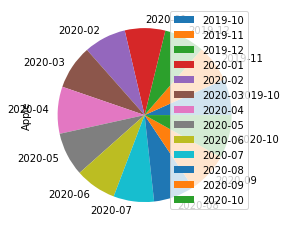

In [208]:
df.set_index('Date').plot.pie(y='Apple')

- 우리가 원하는 형태는 아님

`-` 원하는 형태로 만들기 위해서는 (1)transpose 해야하고 (2)인덱스가 Samsung, Apple, ... 와 같이 회사이름이 되어야함

In [209]:
df.T #transpose, Date가 col 인덱스가 되도록 해야함

,0,1,2,3,4,5,6,7,8,9,10,11,12
Date,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10
Samsung,31.49,31.36,31.37,31.29,30.91,30.8,30.41,30.18,31.06,30.95,31.04,30.57,30.25
Apple,22.09,22.9,24.79,24.76,25.89,27.03,28.79,26.72,25.26,24.82,25.15,24.98,26.53
Huawei,10.02,10.18,9.95,10.61,10.98,10.7,10.28,10.39,10.69,10.75,10.73,10.58,10.44
Xiaomi,7.79,8.16,7.73,8.1,7.8,7.7,7.6,8.36,8.55,8.94,8.9,9.49,9.67
Oppo,4.1,4.42,4.23,4.25,4.31,4.3,4.2,4.7,4.65,4.69,4.69,4.94,4.83
Mobicel,3.15,3.41,3.19,3.02,2.89,2.87,2.75,3.12,3.18,3.46,3.38,3.5,2.54
Motorola,2.41,2.4,2.5,2.42,2.36,2.35,2.51,2.46,2.57,2.45,2.39,2.27,2.21
LG,2.4,2.4,2.54,2.4,2.34,2.28,2.28,2.19,2.11,2.03,1.96,1.88,1.79
Others,9.51,9.1,8.13,7.55,7.06,6.63,5.84,6.31,6.39,6.41,6.31,6.12,6.04


In [210]:
df.set_index('Date')

,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
Date,,,,,,,,,,,,,,,,
2019-10,31.49,22.09,10.02,7.79,4.10,3.15,2.41,2.40,9.51,0.54,2.35,0.95,0.96,0.70,0.84,0.74
2019-11,31.36,22.90,10.18,8.16,4.42,3.41,2.40,2.40,9.10,0.78,0.66,0.97,0.97,0.73,0.83,0.75
2019-12,31.37,24.79,9.95,7.73,4.23,3.19,2.50,2.54,8.13,0.84,0.75,0.90,0.87,0.74,0.77,0.70
2020-01,31.29,24.76,10.61,8.10,4.25,3.02,2.42,2.40,7.55,0.88,0.69,0.88,0.86,0.79,0.80,0.69
2020-02,30.91,25.89,10.98,7.80,4.31,2.89,2.36,2.34,7.06,0.89,0.70,0.81,0.77,0.78,0.80,0.69
2020-03,30.80,27.03,10.70,7.70,4.30,2.87,2.35,2.28,6.63,0.93,0.73,0.72,0.74,0.78,0.76,0.66
2020-04,30.41,28.79,10.28,7.60,4.20,2.75,2.51,2.28,5.84,0.90,0.75,0.69,0.71,0.80,0.76,0.70
2020-05,30.18,26.72,10.39,8.36,4.70,3.12,2.46,2.19,6.31,1.04,0.70,0.73,0.77,0.81,0.78,0.76
2020-06,31.06,25.26,10.69,8.55,4.65,3.18,2.57,2.11,6.39,1.04,0.68,0.74,0.75,0.77,0.78,0.75


In [211]:
df.set_index('Date').T

Date,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10
Samsung,31.49,31.36,31.37,31.29,30.91,30.80,30.41,30.18,31.06,30.95,31.04,30.57,30.25
Apple,22.09,22.90,24.79,24.76,25.89,27.03,28.79,26.72,25.26,24.82,25.15,24.98,26.53
Huawei,10.02,10.18,9.95,10.61,10.98,10.70,10.28,10.39,10.69,10.75,10.73,10.58,10.44
Xiaomi,7.79,8.16,7.73,8.10,7.80,7.70,7.60,8.36,8.55,8.94,8.90,9.49,9.67
Oppo,4.10,4.42,4.23,4.25,4.31,4.30,4.20,4.70,4.65,4.69,4.69,4.94,4.83
Mobicel,3.15,3.41,3.19,3.02,2.89,2.87,2.75,3.12,3.18,3.46,3.38,3.50,2.54
Motorola,2.41,2.40,2.50,2.42,2.36,2.35,2.51,2.46,2.57,2.45,2.39,2.27,2.21
LG,2.40,2.40,2.54,2.40,2.34,2.28,2.28,2.19,2.11,2.03,1.96,1.88,1.79
Others,9.51,9.10,8.13,7.55,7.06,6.63,5.84,6.31,6.39,6.41,6.31,6.12,6.04
Realme,0.54,0.78,0.84,0.88,0.89,0.93,0.90,1.04,1.04,1.13,1.18,1.45,1.55


<AxesSubplot:ylabel='2019-10'>

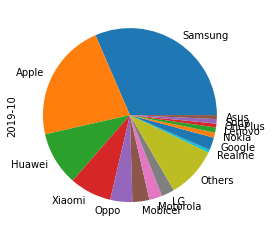

In [212]:
df.set_index('Date').T.plot.pie(y='2019-10',legend=False)

- 정상적인 플랏

array([[<AxesSubplot:ylabel='2019-10'>, <AxesSubplot:ylabel='2019-11'>,
        <AxesSubplot:ylabel='2019-12'>, <AxesSubplot:ylabel='2020-01'>],
       [<AxesSubplot:ylabel='2020-02'>, <AxesSubplot:ylabel='2020-03'>,
        <AxesSubplot:ylabel='2020-04'>, <AxesSubplot:ylabel='2020-05'>],
       [<AxesSubplot:ylabel='2020-06'>, <AxesSubplot:ylabel='2020-07'>,
        <AxesSubplot:ylabel='2020-08'>, <AxesSubplot:ylabel='2020-09'>],
       [<AxesSubplot:ylabel='2020-10'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

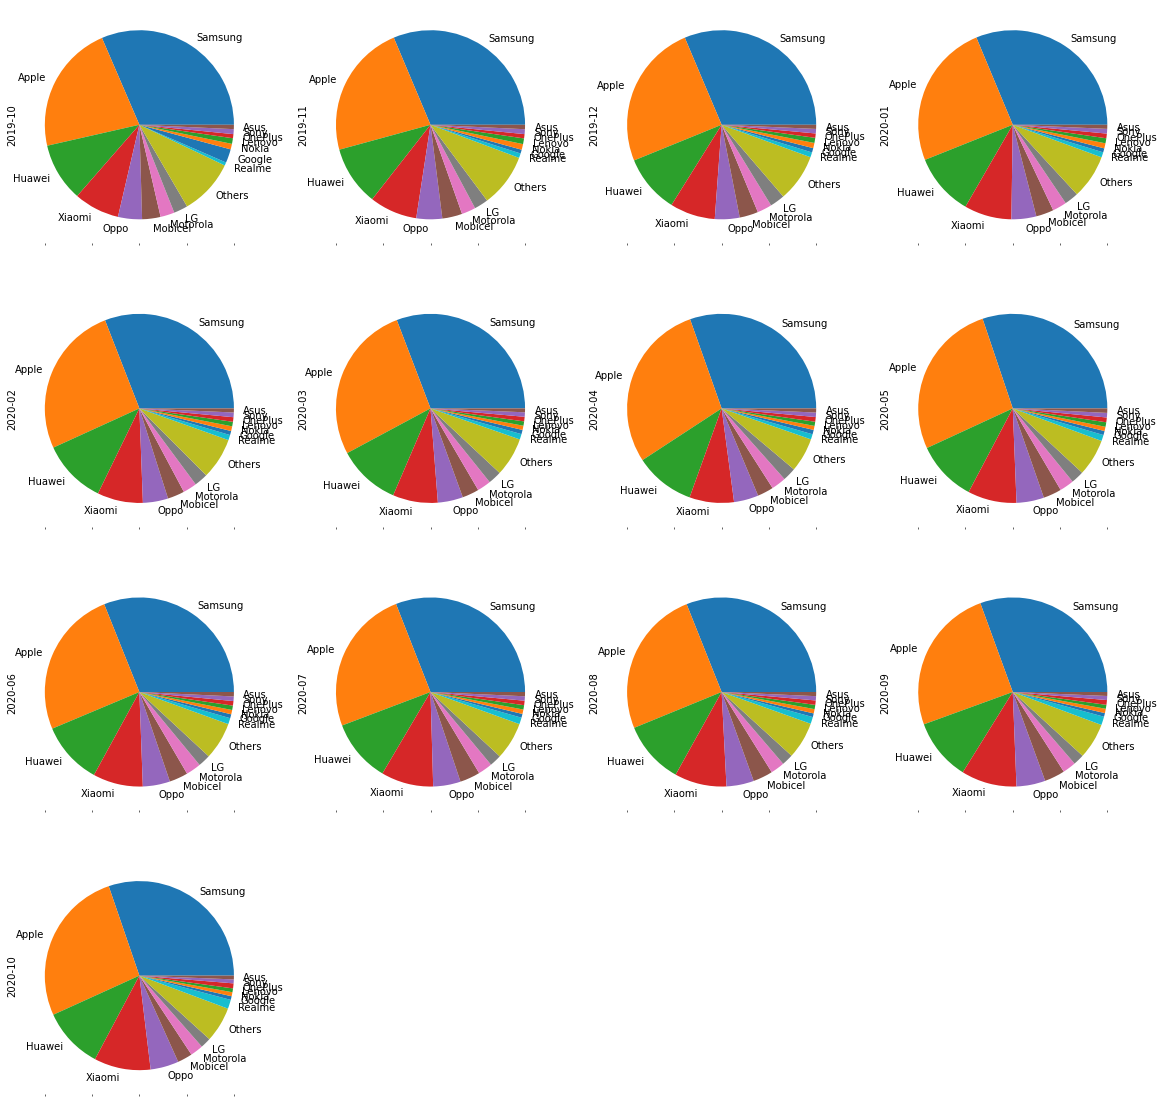

In [213]:
df.set_index('Date').T.plot.pie(legend=False,subplots=True,layout=(4,4),figsize=(20,20))

- 사실 숫자를 비교하기 위해서는 파이차트보다 바플랏이 좋음.
- 그리고 시간에 따른 변화를 보기에는 라인차트가 좋음.
- piechart는 matplotlib 백엔드를 지원한다(plotly는 X)

### boxplot

`-` plotly, matplotlib 백엔드 모두 지원

#### 예제1(matplotlib)

In [214]:
df = pd.read_csv('https://raw.githubusercontent.com/kalilurrahman/datasets/main/mobilephonemktshare2020.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,31.49,22.09,10.02,7.79,4.10,3.15,2.41,2.40,9.51,0.54,2.35,0.95,0.96,0.70,0.84,0.74
1,2019-11,31.36,22.90,10.18,8.16,4.42,3.41,2.40,2.40,9.10,0.78,0.66,0.97,0.97,0.73,0.83,0.75
2,2019-12,31.37,24.79,9.95,7.73,4.23,3.19,2.50,2.54,8.13,0.84,0.75,0.90,0.87,0.74,0.77,0.70
3,2020-01,31.29,24.76,10.61,8.10,4.25,3.02,2.42,2.40,7.55,0.88,0.69,0.88,0.86,0.79,0.80,0.69
4,2020-02,30.91,25.89,10.98,7.80,4.31,2.89,2.36,2.34,7.06,0.89,0.70,0.81,0.77,0.78,0.80,0.69
5,2020-03,30.80,27.03,10.70,7.70,4.30,2.87,2.35,2.28,6.63,0.93,0.73,0.72,0.74,0.78,0.76,0.66
6,2020-04,30.41,28.79,10.28,7.60,4.20,2.75,2.51,2.28,5.84,0.90,0.75,0.69,0.71,0.80,0.76,0.70
7,2020-05,30.18,26.72,10.39,8.36,4.70,3.12,2.46,2.19,6.31,1.04,0.70,0.73,0.77,0.81,0.78,0.76
8,2020-06,31.06,25.26,10.69,8.55,4.65,3.18,2.57,2.11,6.39,1.04,0.68,0.74,0.75,0.77,0.78,0.75
9,2020-07,30.95,24.82,10.75,8.94,4.69,3.46,2.45,2.03,6.41,1.13,0.65,0.76,0.74,0.76,0.75,0.72


`-` 점유율의 차이를 구하자.

In [215]:
df.set_index('Date').diff()

,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
Date,,,,,,,,,,,,,,,,
2019-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11,-0.13,0.81,0.16,0.37,0.32,0.26,-0.01,0.00,-0.41,0.24,-1.69,0.02,0.01,0.03,-0.01,0.01
2019-12,0.01,1.89,-0.23,-0.43,-0.19,-0.22,0.10,0.14,-0.97,0.06,0.09,-0.07,-0.10,0.01,-0.06,-0.05
2020-01,-0.08,-0.03,0.66,0.37,0.02,-0.17,-0.08,-0.14,-0.58,0.04,-0.06,-0.02,-0.01,0.05,0.03,-0.01
2020-02,-0.38,1.13,0.37,-0.30,0.06,-0.13,-0.06,-0.06,-0.49,0.01,0.01,-0.07,-0.09,-0.01,0.00,0.00
2020-03,-0.11,1.14,-0.28,-0.10,-0.01,-0.02,-0.01,-0.06,-0.43,0.04,0.03,-0.09,-0.03,0.00,-0.04,-0.03
2020-04,-0.39,1.76,-0.42,-0.10,-0.10,-0.12,0.16,0.00,-0.79,-0.03,0.02,-0.03,-0.03,0.02,0.00,0.04
2020-05,-0.23,-2.07,0.11,0.76,0.50,0.37,-0.05,-0.09,0.47,0.14,-0.05,0.04,0.06,0.01,0.02,0.06
2020-06,0.88,-1.46,0.30,0.19,-0.05,0.06,0.11,-0.08,0.08,0.00,-0.02,0.01,-0.02,-0.04,0.00,-0.01


In [216]:
31.36-31.49

-0.129999999999999

In [217]:
df.set_index('Date').diff().dropna() #NaN제거

,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
Date,,,,,,,,,,,,,,,,
2019-11,-0.13,0.81,0.16,0.37,0.32,0.26,-0.01,0.00,-0.41,0.24,-1.69,0.02,0.01,0.03,-0.01,0.01
2019-12,0.01,1.89,-0.23,-0.43,-0.19,-0.22,0.10,0.14,-0.97,0.06,0.09,-0.07,-0.10,0.01,-0.06,-0.05
2020-01,-0.08,-0.03,0.66,0.37,0.02,-0.17,-0.08,-0.14,-0.58,0.04,-0.06,-0.02,-0.01,0.05,0.03,-0.01
2020-02,-0.38,1.13,0.37,-0.30,0.06,-0.13,-0.06,-0.06,-0.49,0.01,0.01,-0.07,-0.09,-0.01,0.00,0.00
2020-03,-0.11,1.14,-0.28,-0.10,-0.01,-0.02,-0.01,-0.06,-0.43,0.04,0.03,-0.09,-0.03,0.00,-0.04,-0.03
2020-04,-0.39,1.76,-0.42,-0.10,-0.10,-0.12,0.16,0.00,-0.79,-0.03,0.02,-0.03,-0.03,0.02,0.00,0.04
2020-05,-0.23,-2.07,0.11,0.76,0.50,0.37,-0.05,-0.09,0.47,0.14,-0.05,0.04,0.06,0.01,0.02,0.06
2020-06,0.88,-1.46,0.30,0.19,-0.05,0.06,0.11,-0.08,0.08,0.00,-0.02,0.01,-0.02,-0.04,0.00,-0.01
2020-07,-0.11,-0.44,0.06,0.39,0.04,0.28,-0.12,-0.08,0.02,0.09,-0.03,0.02,-0.01,-0.01,-0.03,-0.03


<AxesSubplot:>

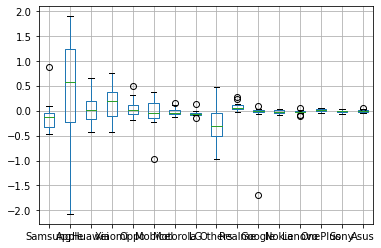

In [218]:
df.set_index('Date').diff().dropna().boxplot()

<AxesSubplot:>

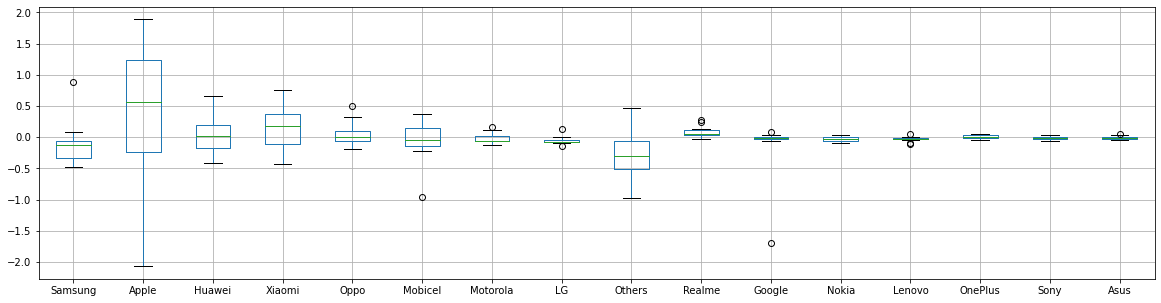

In [219]:
df.set_index('Date').diff().dropna().boxplot(figsize=(20,5)) #Samsung,Others 감소추세, Apple,Xiaomi 증가추세

#### 예제2(plotly)

`-` 위와 동일한 그림을 plotly backend로도 그릴 수 있음.(plotly가 조금 융통성이 있음)

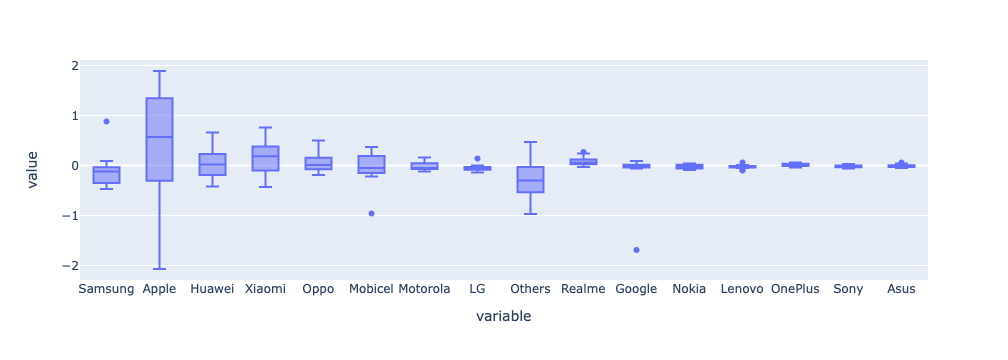

In [220]:
df.set_index('Date').diff().dropna().boxplot(backend='plotly')

`-` 회사를 색깔별로 구분하여 범주를 만들고 싶다 ?

In [221]:
df.set_index('Date').diff().dropna().melt()

,variable,value
0,Samsung,-0.13
1,Samsung,0.01
2,Samsung,-0.08
3,Samsung,-0.38
4,Samsung,-0.11
...,...,...
187,Asus,-0.01
188,Asus,-0.03
189,Asus,-0.02
190,Asus,-0.03


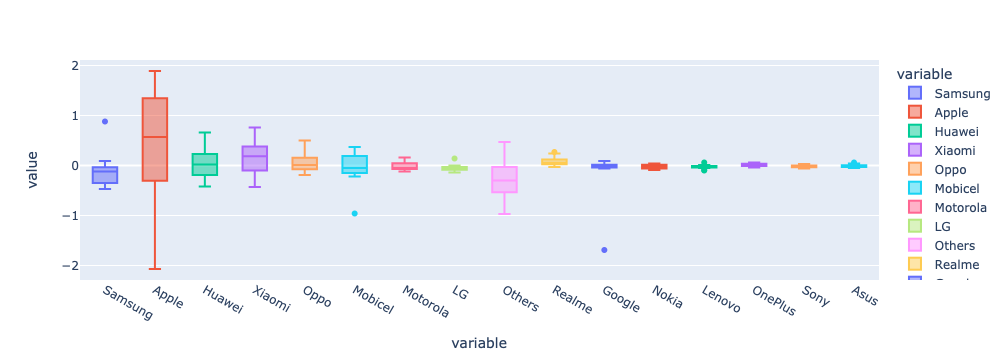

In [222]:
df.set_index('Date').diff().dropna().melt().\
plot.box(backend='plotly',x='variable',color='variable',y='value')

- 색깔별로 회사를 구분하면 좋은 이유 ? 범주를 클릭해보자

#### 예제3(plotly)

In [223]:
import plotly.express as px
df=px.data.tips()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


`-` 팁은 대체로 얼마나 받는지?

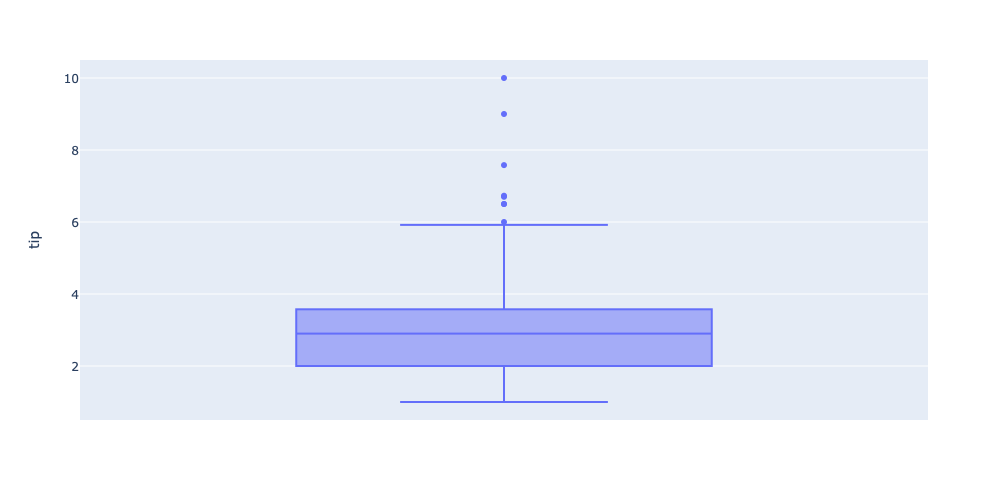

In [224]:
df.plot.box(backend='plotly',y='tip',height=500,width=500)

`-` 점심/저녁에 따라서 팁의 분포가 다를까?

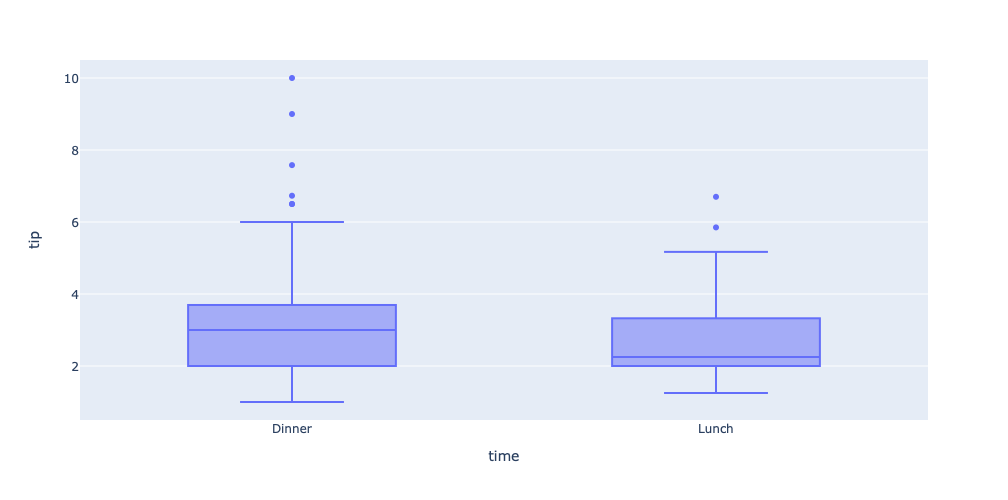

In [225]:
df.plot.box(backend='plotly',y='tip',x='time',height=500,width=500)

- 저녁에 좀 더 잘주는듯 하다.

`-` 성별에 따라서도 팁을 주는것이 다를까?

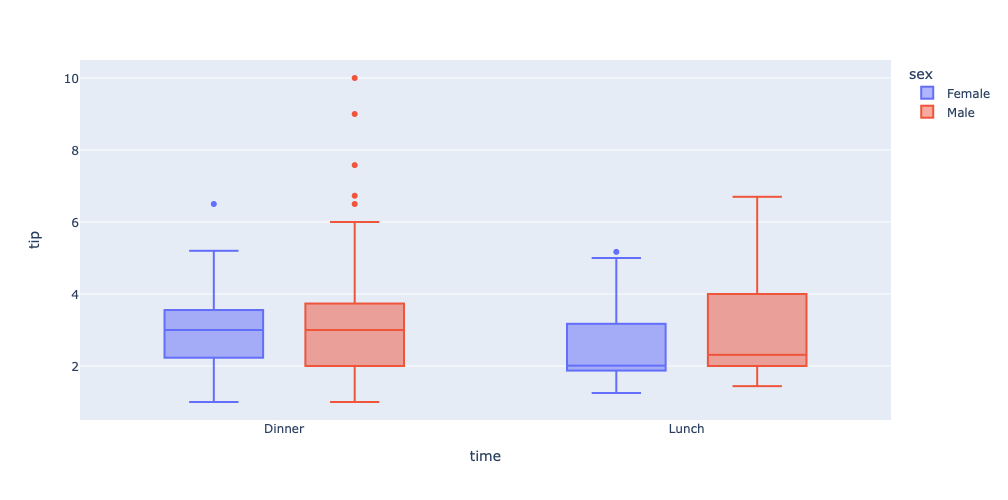

In [226]:
df.plot.box(backend='plotly',y='tip',x='time',color='sex',height=500,width=500)

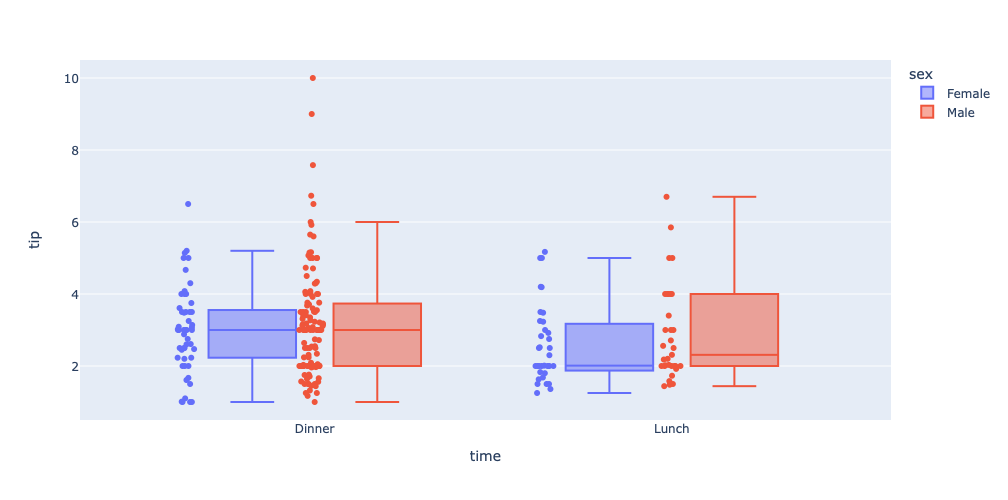

In [227]:
df.plot.box(backend='plotly',y='tip',x='time',color='sex',height=500,width=500,points='all')

- boxplot의 아웃라이어가 사라지고, ,데이터를 더 리치하게 볼 수 있다.

`-` 요일에 따라서도 달라질까?

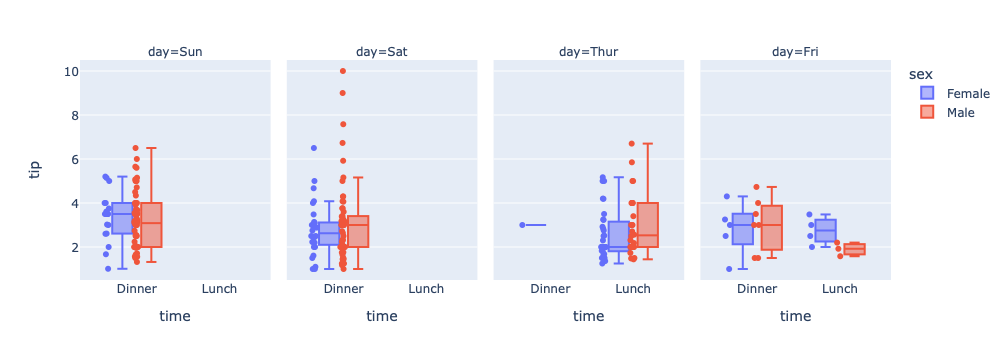

In [228]:
df.plot.box(backend='plotly',y='tip',x='time',color='sex',facet_col='day',points='all')

`-` 흡연유무에 따라서도 달라질까?

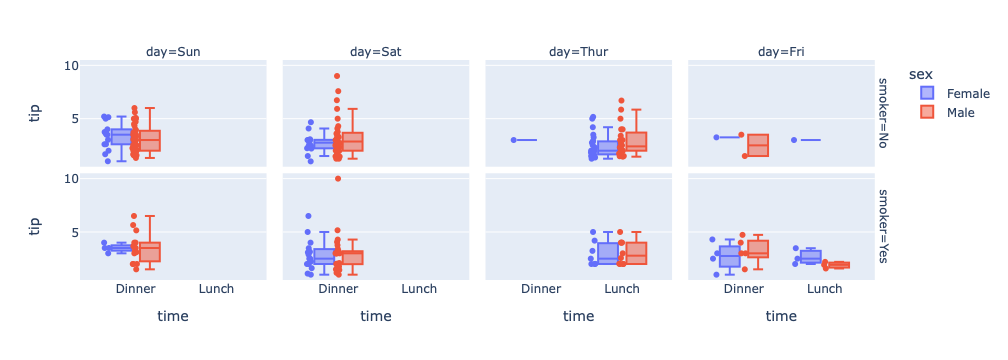

In [229]:
df.plot.box(backend='plotly',y='tip',x='time',color='sex',facet_col='day',facet_row='smoker',points='all')

- tidydata로 한번 만들어 두니 너무 쉽게 생각하는 대로 구현가능

`-` tidydata가 확실히 고차원 자료를 그리기에 유리함. matplotlib은 위와 같은 형태를 그리는 것 자체가 불가능

### hist, kde, density

#### 예제1 (matplotlib)

`-` 시뮬레이션예제: 정규분포를 만들어서 제곱한뒤에 3개씩, 4개씩, ... 10개까지 더함 $\to$ 카이제곱분포

`-` 일단 3개부터 구현해보자.

In [230]:
X=np.random.normal(size=(1000,3),loc=0,scale=1)
X

array([[-0.14713158, -1.64124442, -0.01866624],
       [-0.34682283,  0.36868687,  0.75214685],
       [ 0.22424299, -0.89786945, -0.37241484],
       ...,
       [-1.85428722,  0.09767506, -0.38790545],
       [ 0.41583868,  0.49164276,  0.97610232],
       [ 1.27511818, -0.79881122,  0.79922223]])

In [231]:
X**2

array([[2.16477017e-02, 2.69368325e+00, 3.48428539e-04],
       [1.20286074e-01, 1.35930006e-01, 5.65724886e-01],
       [5.02849192e-02, 8.06169554e-01, 1.38692816e-01],
       ...,
       [3.43838108e+00, 9.54041650e-03, 1.50470641e-01],
       [1.72921811e-01, 2.41712607e-01, 9.52775733e-01],
       [1.62592638e+00, 6.38099362e-01, 6.38756168e-01]])

In [232]:
#(X**2).sum(axis=1)

In [233]:
4.75466148e-03+7.26106810e-01+7.95921656e+00 #결과확인

8.69007803148

`-` 코드를 정리하면

In [234]:
# ((np.random.normal(size=(1000,3),loc=0,scale=1))**2).sum(axis=1)
# ((np.random.normal(size=(1000,4),loc=0,scale=1))**2).sum(axis=1)
# ...
# ((np.random.normal(size=(1000,10),loc=0,scale=1))**2).sum(axis=1)

In [235]:
_arr = [3,4,5,6,7,8,9,10]
df=pd.DataFrame([((np.random.normal(size=(1000,_arr[i]),loc=0,scale=1))**2).sum(axis=1).tolist() for i in range(len(_arr))]).T
df

,0,1,2,3,4,5,6,7
0,1.831902,4.475323,6.354244,4.958910,4.317890,5.244456,11.525489,6.847181
1,2.557658,0.834202,2.375446,2.871762,4.722598,5.232701,13.053888,9.795127
2,0.578204,2.870418,7.673467,6.503206,8.160498,7.188695,17.005650,9.137232
3,2.638481,1.124857,3.296329,8.983057,3.758529,12.714790,9.883707,8.934332
4,0.383793,2.331523,10.111754,3.373875,3.347933,3.783838,2.341403,10.494845
...,...,...,...,...,...,...,...,...
995,0.187744,8.352139,10.525640,8.817561,9.991903,16.884880,13.579024,15.063407
996,0.154118,8.238124,2.182620,4.101527,7.677151,14.852259,12.035051,10.053484
997,1.083021,2.479000,1.451117,7.316244,15.580721,9.642410,3.039194,4.288637
998,2.719003,9.515040,4.130856,3.803913,3.787521,4.763457,6.629691,7.696182


- 컬럼 0이 의미하는 것은 정규분포를 제곱하여 3개씩 더하여 나온 값이고, 컬럼 1이 의미하는 것은 정규분포를 제곱해서 4개씩 더해서 나온 값임 $\to$ 열의 이름을 지어주자.

In [236]:
df.columns=_arr

In [237]:
df

,3,4,5,6,7,8,9,10
0,1.831902,4.475323,6.354244,4.958910,4.317890,5.244456,11.525489,6.847181
1,2.557658,0.834202,2.375446,2.871762,4.722598,5.232701,13.053888,9.795127
2,0.578204,2.870418,7.673467,6.503206,8.160498,7.188695,17.005650,9.137232
3,2.638481,1.124857,3.296329,8.983057,3.758529,12.714790,9.883707,8.934332
4,0.383793,2.331523,10.111754,3.373875,3.347933,3.783838,2.341403,10.494845
...,...,...,...,...,...,...,...,...
995,0.187744,8.352139,10.525640,8.817561,9.991903,16.884880,13.579024,15.063407
996,0.154118,8.238124,2.182620,4.101527,7.677151,14.852259,12.035051,10.053484
997,1.083021,2.479000,1.451117,7.316244,15.580721,9.642410,3.039194,4.288637
998,2.719003,9.515040,4.130856,3.803913,3.787521,4.763457,6.629691,7.696182


`-` 분포를 그려보자.

<AxesSubplot:ylabel='Frequency'>

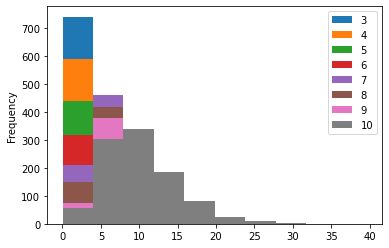

In [238]:
df.plot.hist()

- 알수가 없다.

`-` bins와 투명도 조절

<AxesSubplot:ylabel='Frequency'>

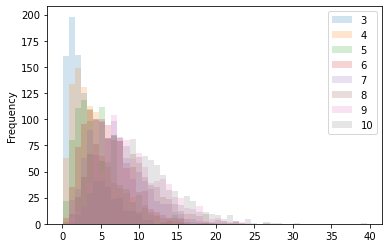

In [239]:
df.plot.hist(alpha=0.2,bins=50)

여전히 알기엔 어렵다

`-` 서브플랏

In [240]:
import matplotlib.pyplot as plt

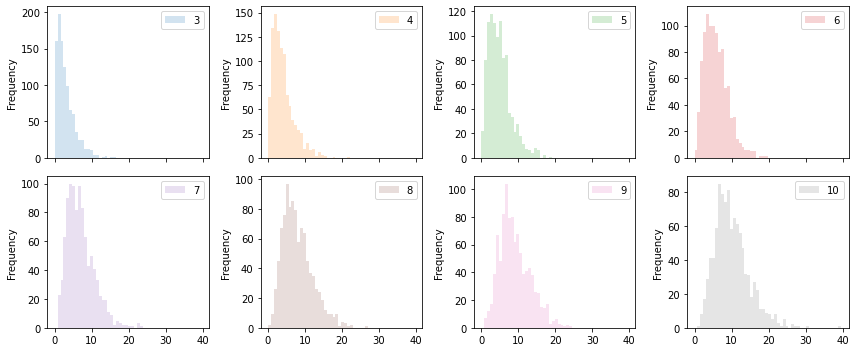

In [241]:
df.plot.hist(alpha=0.2,bins=50,layout=(2,4),subplots=True,figsize=(12,5))
plt.tight_layout()

`-` kde 플랏

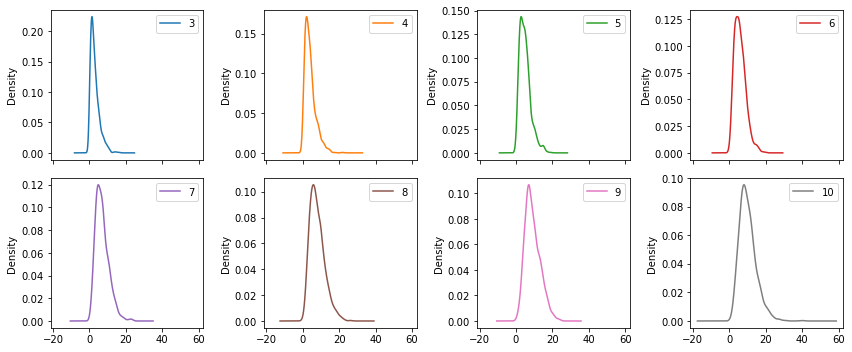

In [242]:
df.plot.kde(layout=(2,4),subplots=True,figsize=(12,5))
plt.tight_layout()

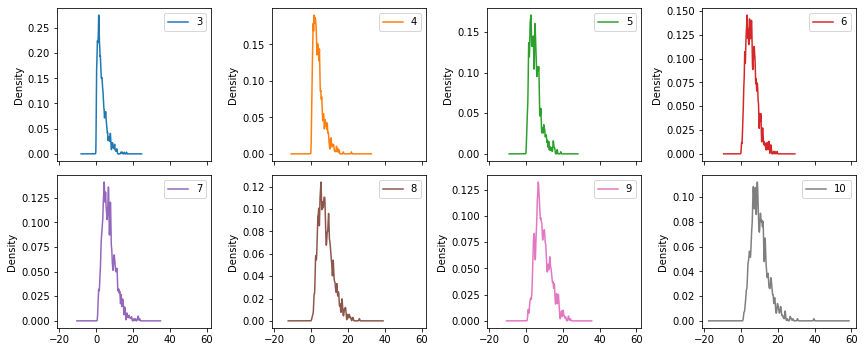

In [243]:
df.plot.kde(layout=(2,4),subplots=True,bw_method=0.05,figsize=(12,5))
plt.tight_layout()

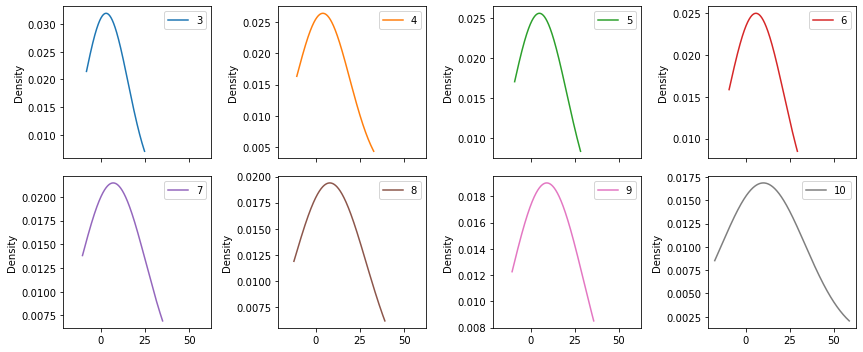

In [244]:
df.plot.kde(layout=(2,4),subplots=True,bw_method=5,figsize=(12,5))
plt.tight_layout()

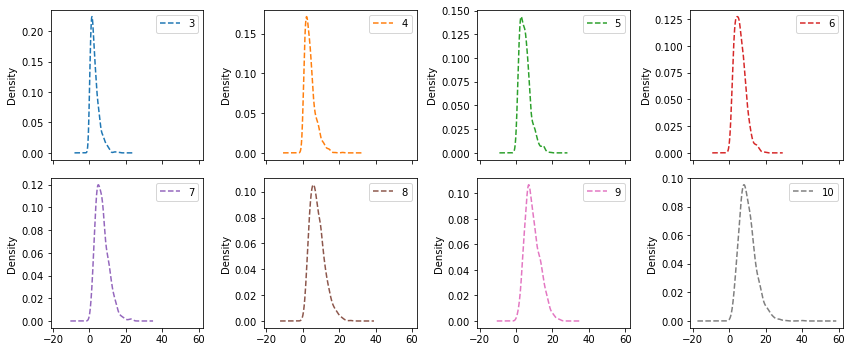

In [245]:
df.plot.kde(layout=(2,4),subplots=True,figsize=(12,5),ls='--')
plt.tight_layout()

#### 예제2 (plotly)

`-` 다시 tips 예제로 돌아오자.

In [246]:
import plotly.express as px
df=px.data.tips()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


`-` 성별에 따라서 팁을 주는게 다를까?

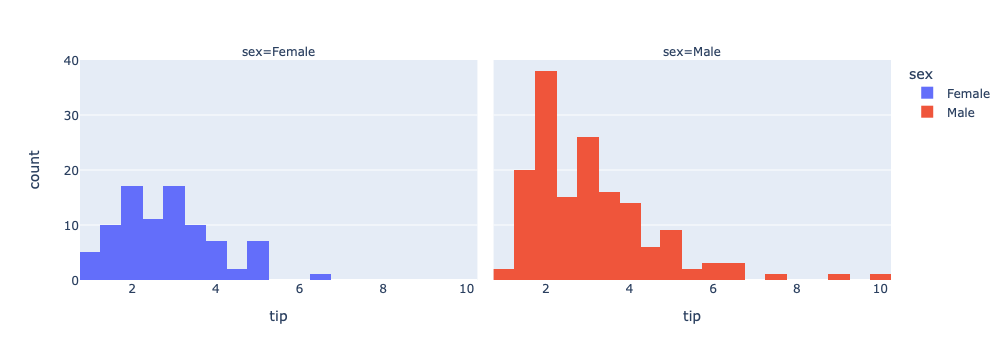

In [247]:
df.plot.hist(x='tip',color='sex',backend='plotly',facet_col='sex')

- 빈도가 잘 보인다는 측면에서 박스플랏보다 좋은것 같음

`-` 시간에 따라서도 다른지?

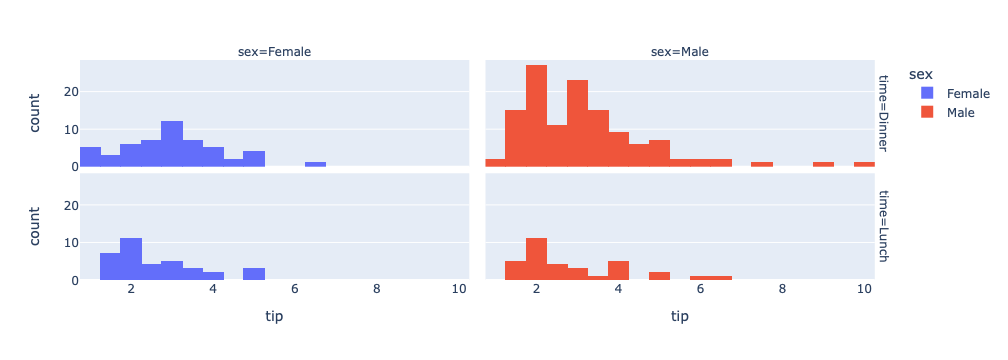

In [248]:
df.plot.hist(x='tip',color='sex',backend='plotly',facet_col='sex',facet_row='time')

- tidydata가 확실히 자료를 처리하기 편리함